# Naive Bayes - Youtube Spam Classification
### Liam Caulfield
##### May 7, 2023

**Part 1:**
1. Explain how to turn P(E|H) to P(H|E) in layman's terms. - Limit explanation to no more than two paragraphs.
2. Use an example from real life to expand the explanation. 

**Part 2:**
We will be utilizing a Youtube spam collection dataset, consisting of five csv files from separate artists. These datasets are composed of 1,956 real messages extracted from five separate videos. All five of the datasets contain the following attributes:
1. Comment_ID
2. Author_ID
3. Date
4. Content of the comment
5. Class of the attributes (spam or not)

***We will then perform the following steps:***
1. Use any four datasets to build a spam filter using the Naive Bayes Approach.
2. Use the filter to check the accuracy of the unused dateset. 
3. Report the details of the training and the model.

***Sources:***
1. https://stats.stackexchange.com/questions/191805/r-plotting-a-roc-curve-for-a-naive-bayes-classifier-using-rocr-not-sure-if-i
2. https://www.tutorialspoint.com/scikit_learn/scikit_learn_classification_with_naive_bayes.htm
3. https://www.kaggle.com/code/catris25/multinomial-naive-bayes-with-countvectorizer


##### Part 1: Naive Bayes Approach Explained

***We will pretending that the target audience is a high school student.***
Fundamentally, P(E|H) represents the probability of observing the evidence (E) assuming that the hypothesis (H) is true. In simple terms, imagine you are a weather reporter for your local news channel and are trying to predict if it will rain at some point in the coming days. Your hypothesis is that it will rain. An example of evidence to look for would be (other than simply living in the Pacific Northwest in winter...) the probability of seeing dark clouds if it will in fact rain tomorrow. 

In Naive Bayes, we turn that equation around and consider the probabilty of rain based on the relationship of dark clouds on rainy days based on historical data. By flipping this perspective, we can train Naive Bayes algorithms to leverage patterns in historical data to help understand the relationship between dark clouds and rainy days. This approach allows us to increase the accuracy of our predictions about future weather conditions based on the observable evidence of dark clouds. 

In [1]:
# load necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import make_blobs

In [2]:
# Load all five datasets
# we will be using df3 as the test dataset and training on the other 4 
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')

In [3]:
# Now we need to combine the datasets for training
train_data = pd.concat([df1, df2, df4, df5])

In [4]:
# Perform feature extraction
print('Performing feature extraction...')
vectorizer = CountVectorizer()

# train independent variables on CONTENT and dependent on CLASS attributes
X_train = vectorizer.fit_transform(train_data['CONTENT'])
y_train = train_data['CLASS']

Performing feature extraction...


In [5]:
# Train the model using MultnomialNB()
print('Training the Naive Bayes classification...')
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

Training the Naive Bayes classification...


MultinomialNB()

In [6]:
# Use dataset three for model evaluation
print('Evaluating the model on the LMFAO dataset...')
test_data = df3
X_test = vectorizer.transform(test_data['CONTENT'])
y_test = test_data['CLASS']

Evaluating the model on the LMFAO dataset...


In [7]:
# Gather predictions and collect accuracy score
predictions = naive_bayes.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

In [8]:
# Report of training details
print("Training details:")
print("Feature extraction approach: CountVectorizer")
print("Training data used: df1, df2, df4, df5")
print("Number of spam comments in the training data:", sum(y_train == 1))
print("Number of non-spam comments in the training data:", sum(y_train == 0))

Training details:
Feature extraction approach: CountVectorizer
Training data used: df1, df2, df4, df5
Number of spam comments in the training data: 769
Number of non-spam comments in the training data: 749


In [9]:
# Report of model evaluation
print("Model evaluation:")
print("Remaining dataset used for evaluation: df3")
print("Accuracy on the remaining dataset:", accuracy)

Model evaluation:
Remaining dataset used for evaluation: df3
Accuracy on the remaining dataset: 0.9041095890410958


***Increase the strength of our understanding of model evaluation with visuals:***

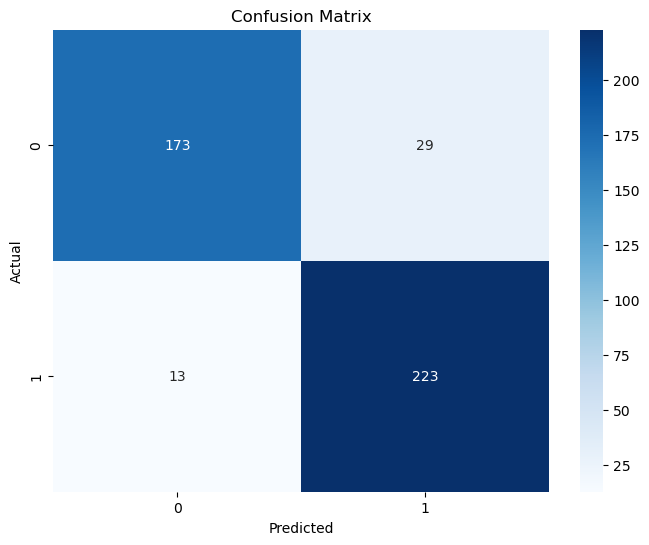

In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

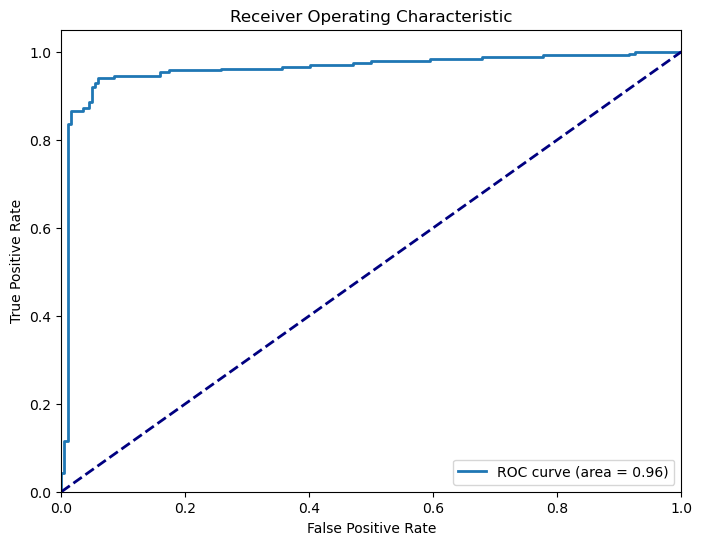

In [11]:
# Get the predicted probabilities for positive class (spam)
probas = naive_bayes.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, probas)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

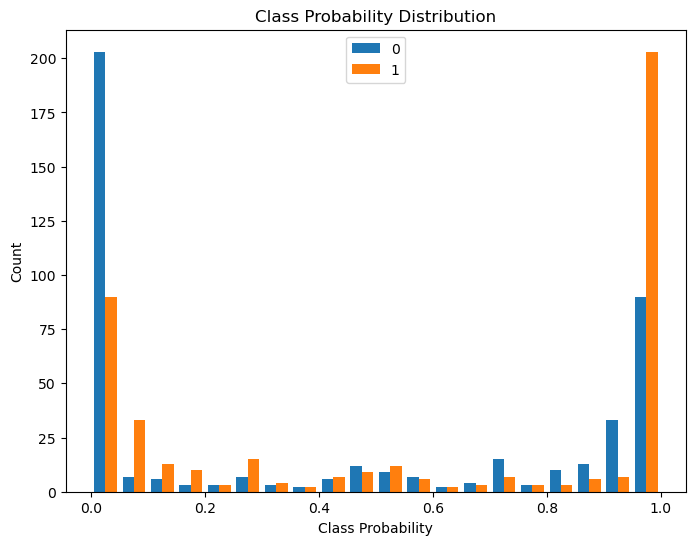

In [12]:
# Obtain the predicted probabilities based on class
probas = naive_bayes.predict_proba(X_test)

# Plot class probability distribution
plt.figure(figsize=(8, 6))
plt.hist(probas, bins=20, label=naive_bayes.classes_)
plt.xlabel('Class Probability')
plt.ylabel('Count')
plt.title('Class Probability Distribution')
plt.legend()
plt.show()

***Findings Summary:***
We used the CountVectorizer approach for feature extraction, with all datasets other than df3 used for training our model. We found 769 spam comments in the training dataset and 749 non-spam comments. Overall, the Naive Bayes approach for detecting Youtube spam comments was quite robust, accurately identifying more than 90% of spam comments in the unseen data of df3 - which was used as our test dataset. 

To further our understanding of our model evaluation, we have plotted the following three visuals:
1. Confusion Matrix - this shows us that out of 438 CLASS values, our model led to the following confusion matrix metrics: False positive = 11.5%, True Positive = 93.01%, False Negative = 6.9 %, and True Negative = 88.4%.
2. ROC - our area of .96 indicates a very high level of accuracy in distinguishing between spam and non-spam instances. 
3. Our Class Probability Distribution shows a strong ability to determine spam and non-spam with an increased understanding of how our model failed to accuractely predict and where certain instances fell in between a clear identification of spam or not spam. 